In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('file:///Users/DeLaLuna/Downloads/Data_Marketing_Customer_Analysis_Round3%20(1).csv')

# Display the DataFrame
print(df)


            region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      effective_to_date month employment_status gender  income  ...  \
0               

/var/folders/5w/l2b_mycn1hjf2d6nrhbhwsf00000gn/T/ipykernel_8833/1062756649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


                               customer_lifetime_value  income  \
customer_lifetime_value                            1.0     NaN   
income                                             NaN     1.0   
monthly_premium_auto                               NaN     NaN   
months_since_last_claim                            NaN     NaN   
months_since_policy_inception                      NaN     NaN   
number_of_open_complaints                          NaN     NaN   
number_of_policies                                 NaN     NaN   
total_claim_amount                                 NaN     NaN   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                         NaN                      NaN   
income                                          NaN                      NaN   
monthly_premium_auto                            1.0                      NaN   
months_since_last_claim                         NaN                      1.0   
month

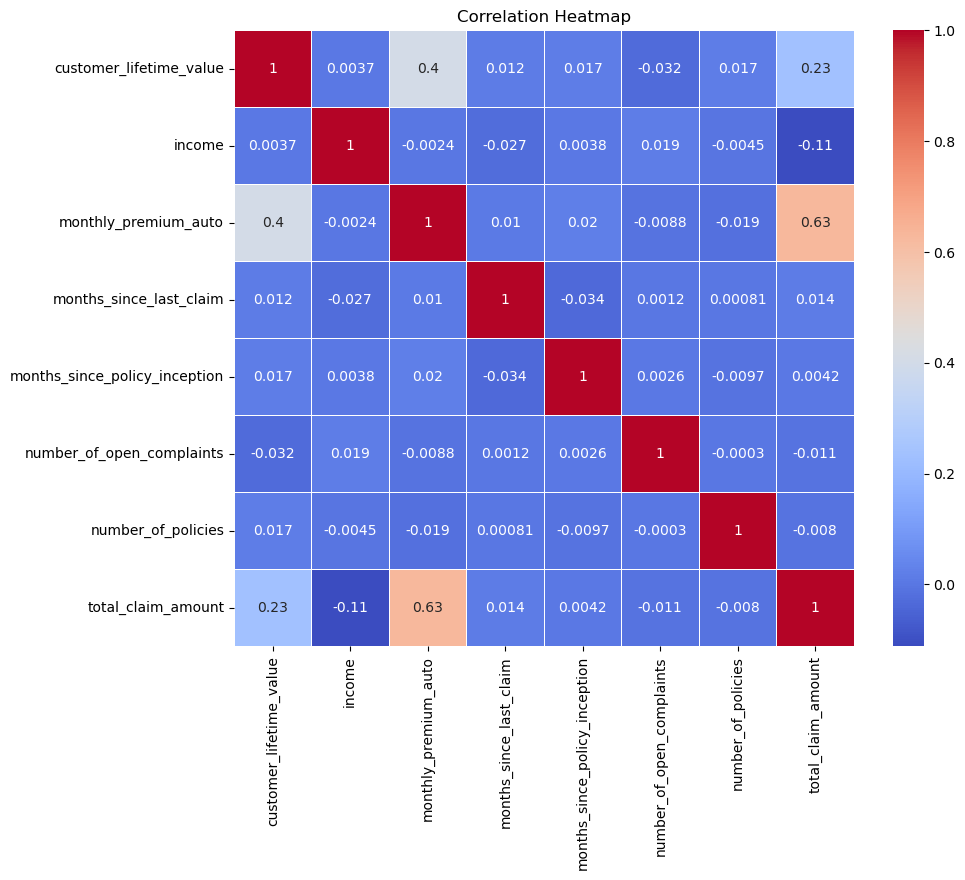

In [18]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find highly correlated variables
highly_correlated = corr_matrix[corr_matrix > 0.9]

# Print the highly correlated variables
print(highly_correlated)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [19]:

categorical_columns = df.select_dtypes(include='object').columns

# Print the list of categorical columns
print(categorical_columns)


Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


In [22]:
df.head(20) ordinal categories: 'coverage', 'education', 'policy', 'vehicle_size'

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2011-02-18,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,2011-01-18,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2011-02-10,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,2011-01-11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,2011-01-17,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
5,west region,4745,yes,basic,high school or below,2011-02-14,feb,employed,m,50549,...,73,0,7,personal auto,personal l3,offer1,agent,292,four-door car,medsize
6,west region,5035,no,basic,doctor,2011-02-14,feb,employed,f,37405,...,99,3,4,corporate auto,corporate l2,offer2,branch,287,four-door car,medsize
7,west region,4956,no,basic,high school or below,2011-02-24,feb,employed,m,87197,...,45,0,3,personal auto,personal l2,offer2,branch,247,two-door car,medsize
8,west region,5989,yes,premium,college,2011-01-19,jan,employed,m,66839,...,24,0,1,personal auto,personal l1,offer2,branch,739,sports car,medsize
9,north west,17114,no,extended,master,2011-01-04,jan,employed,f,70961,...,8,0,2,corporate auto,corporate l3,offer2,agent,408,four-door car,small


In [21]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

# Verify the updated data type
print(df.dtypes)


region                                   object
customer_lifetime_value                   int64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
month                                    object
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [23]:
df['region'].unique()

array(['central', 'west region', 'east', 'north west'], dtype=object)

In [25]:
columns_to_encode = ['region', 'response', 'month', 'employment_status', 'gender', 'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class']

# Apply one-hot encoding to the selected columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Display the encoded DataFrame
df_encoded.head()


,customer_lifetime_value,coverage,education,effective_to_date,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,basic,college,2011-02-18,48029,suburban,married,61,7,52,...,1,0,0,0,1,0,0,0,0,0
1,2228,basic,college,2011-01-18,92260,suburban,single,64,3,26,...,0,0,1,0,1,0,0,0,0,0
2,14947,basic,bachelor,2011-02-10,22139,suburban,single,100,34,31,...,0,0,1,0,0,0,0,0,1,0
3,22332,extended,college,2011-01-11,49078,suburban,single,97,10,3,...,0,1,0,0,1,0,0,0,0,0
4,9025,premium,bachelor,2011-01-17,23675,suburban,married,117,33,31,...,0,1,0,0,1,0,0,0,0,0


In [28]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['coverage', 'education', 'policy', 'vehicle_size']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the selected ordinal columns
for column in ordinal_columns:
    df[column] = encoder.fit_transform(df[column])

# Display the updated DataFrame
df.head(20)


,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,0,1,2011-02-18,feb,employed,m,48029,...,52,0,9,corporate auto,2,offer3,agent,292,four-door car,1
1,west region,2228,no,0,1,2011-01-18,jan,unemployed,f,92260,...,26,0,1,personal auto,5,offer4,call center,744,four-door car,1
2,east,14947,no,0,0,2011-02-10,feb,employed,m,22139,...,31,0,2,personal auto,5,offer3,call center,480,suv,1
3,north west,22332,yes,1,1,2011-01-11,jan,employed,m,49078,...,3,0,2,corporate auto,2,offer2,branch,484,four-door car,1
4,north west,9025,no,2,0,2011-01-17,jan,medical leave,f,23675,...,31,0,7,personal auto,4,offer1,branch,707,four-door car,1
5,west region,4745,yes,0,3,2011-02-14,feb,employed,m,50549,...,73,0,7,personal auto,5,offer1,agent,292,four-door car,1
6,west region,5035,no,0,2,2011-02-14,feb,employed,f,37405,...,99,3,4,corporate auto,1,offer2,branch,287,four-door car,1
7,west region,4956,no,0,3,2011-02-24,feb,employed,m,87197,...,45,0,3,personal auto,4,offer2,branch,247,two-door car,1
8,west region,5989,yes,2,1,2011-01-19,jan,employed,m,66839,...,24,0,1,personal auto,3,offer2,branch,739,sports car,1
9,north west,17114,no,1,4,2011-01-04,jan,employed,f,70961,...,8,0,2,corporate auto,2,offer2,agent,408,four-door car,2


In [29]:
# Select numerical columns using select_dtypes
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Display the new DataFrame
df_numerical.head()
# drop the labelled categories that were falsely grouped with numericals


,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,total_claim_amount,vehicle_size
0,4809,0,1,48029,61,7,52,0,9,2,292,1
1,2228,0,1,92260,64,3,26,0,1,5,744,1
2,14947,0,0,22139,100,34,31,0,2,5,480,1
3,22332,1,1,49078,97,10,3,0,2,2,484,1
4,9025,2,0,23675,117,33,31,0,7,4,707,1


In [30]:
# Drop the falsely grouped labeled categories
df_numerical = df_numerical.drop(['coverage', 'education', 'policy', 'vehicle_size'], axis=1)

# Display the updated DataFrame
df_numerical.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


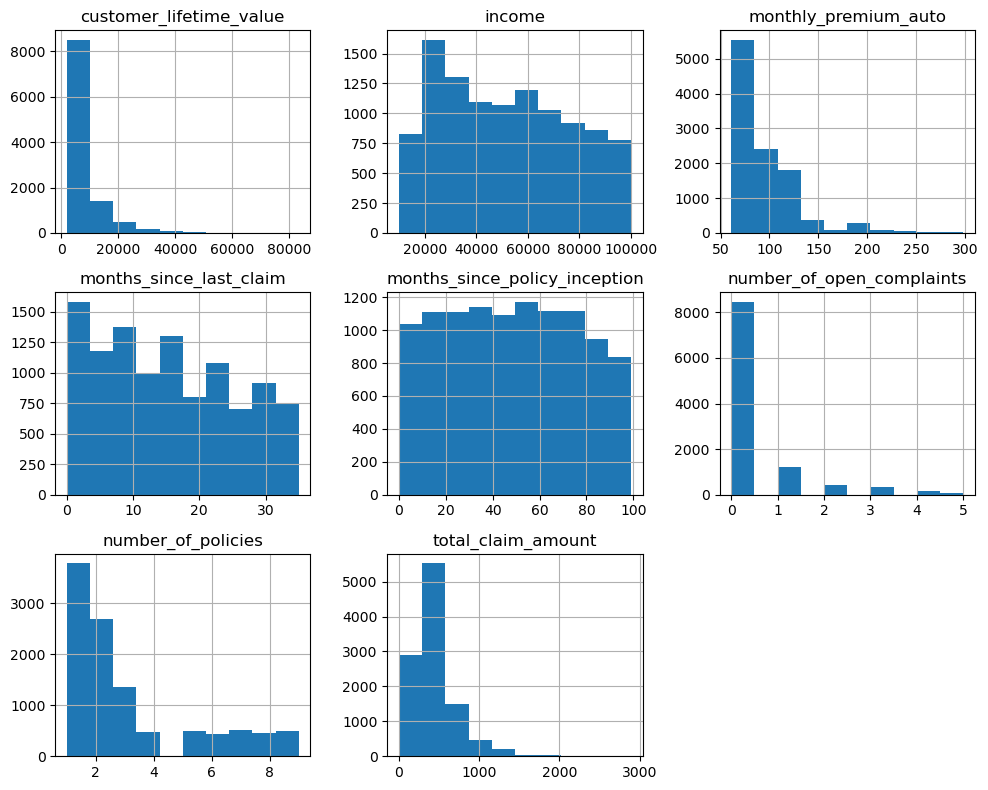

In [31]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df_numerical.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [34]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the variable to a 2D array (required by MinMaxScaler)
months_since_policy_inception_values = df_numerical['months_since_policy_inception'].values.reshape(-1, 1)

# Fit the scaler to the data and transform the variable
months_since_policy_inception_scaled = scaler.fit_transform(months_since_policy_inception_values)

# Assign the scaled values back to the DataFrame
df_numerical['months_since_policy_inception_scaled'] = months_since_policy_inception_scaled


In [36]:
months_since_policy_inception_scaled

array([[0.52525253],
       [0.26262626],
       [0.31313131],
       ...,
       [0.63636364],
       [0.27272727],
       [0.01010101]])

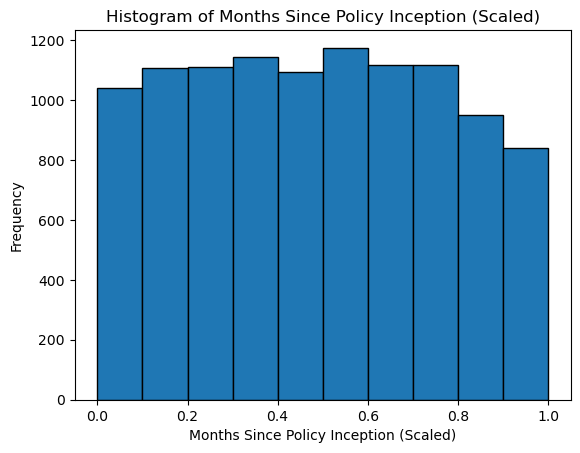

In [37]:
# Plotting the histogram
plt.hist(df_numerical['months_since_policy_inception_scaled'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Months Since Policy Inception (Scaled)')
plt.ylabel('Frequency')
plt.title('Histogram of Months Since Policy Inception (Scaled)')

# Display the plot
plt.show()


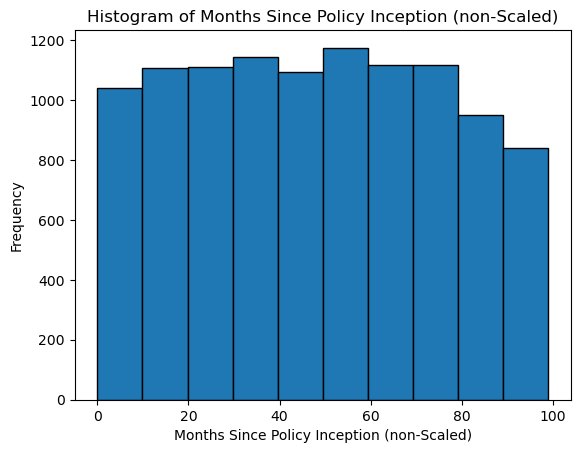

In [38]:
# Plotting the histogram
plt.hist(df_numerical['months_since_policy_inception'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Months Since Policy Inception (non-Scaled)')
plt.ylabel('Frequency')
plt.title('Histogram of Months Since Policy Inception (non-Scaled)')

# Display the plot
plt.show()


In [39]:
from sklearn.preprocessing import PowerTransformer

# Create a PowerTransformer object
power_transformer = PowerTransformer(method='box-cox')

# Reshape the column to a 2-dimensional array
varB_transformed = df_numerical['customer_lifetime_value'].values.reshape(-1, 1)

# Apply the power transform
varB_transformed = power_transformer.fit_transform(varB_transformed)

# Convert the transformed values back to a 1-dimensional array
varB_transformed = varB_transformed.flatten()

# Update the DataFrame with the transformed values
df_numerical['customer_lifetime_value_transformed'] = varB_transformed


Mean of transformed variable: -3.792353173834196e-15
Standard deviation of transformed variable: 1.0000467803429225


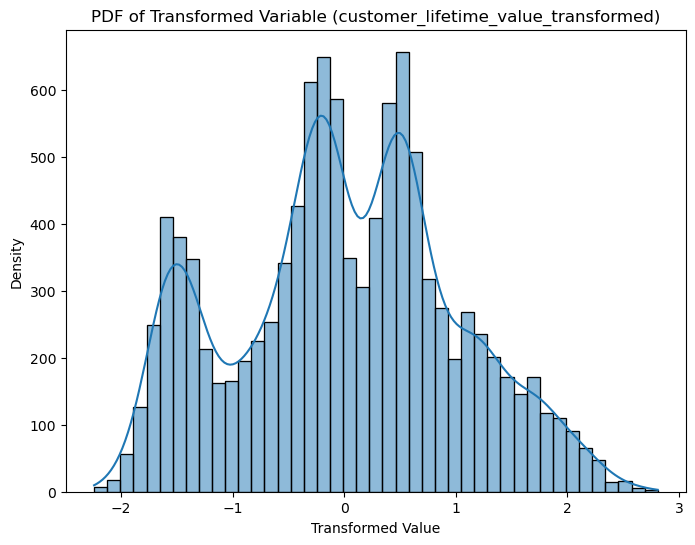

In [40]:
import seaborn as sns

# Calculate the mean and standard deviation of the transformed variable
mean_transformed = df_numerical['customer_lifetime_value_transformed'].mean()
std_transformed = df_numerical['customer_lifetime_value_transformed'].std()

# Print the mean and standard deviation
print("Mean of transformed variable:", mean_transformed)
print("Standard deviation of transformed variable:", std_transformed)

# Plot the PDF of the transformed variable
plt.figure(figsize=(8, 6))
sns.histplot(df_numerical['customer_lifetime_value_transformed'], kde=True)
plt.title('PDF of Transformed Variable (customer_lifetime_value_transformed)')
plt.xlabel('Transformed Value')
plt.ylabel('Density')
plt.show()


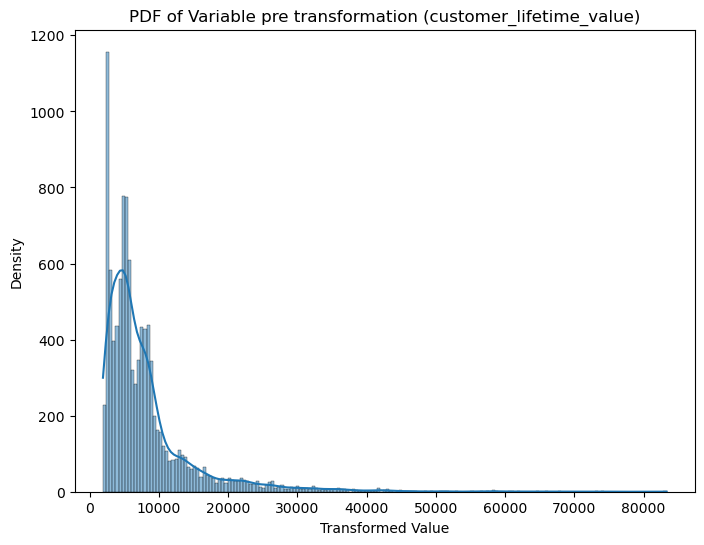

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(df_numerical['customer_lifetime_value'], kde=True)
plt.title('PDF of Variable pre transformation (customer_lifetime_value)')
plt.xlabel('Transformed Value')
plt.ylabel('Density')
plt.show()
